In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [5]:
df = pd.read_csv("Access_to_Tech_Dataset.csv")


In [7]:
df.head()


,id,web_URL_id,domain_category,web_URL,scrape_status,html_file_name,html_file_path,violation_count,violation_name,violation_score,violation_description,violation_description_url,affected_html_elements,violation_category,violation_impact,wcag_reference,supplementary_information
0,700_0,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,color-contrast-enhanced,4,Ensures the contrast between foreground and ba...,https://dequeuniversity.com/rules/axe/4.4/colo...,"<a href=\/buy-from-government\"">How to buy fro...",Layout,serious,['1.4.6 Contrast (Enhanced)'],"{'fgColor': '#00bde3', 'bgColor': '#112f4e', '..."
1,700_1,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,landmark-banner-is-top-level,3,Ensures the banner landmark is at top level,https://dequeuniversity.com/rules/axe/4.4/land...,"<div class=\usa-banner__header\"" role=\""banner...",Syntax,moderate,['1.3.1 Info and Relationships'],"<div class=\usa-banner__header\"" role=\""banner..."
2,700_2,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,landmark-no-duplicate-banner,3,Ensures the document has at most one banner la...,https://dequeuniversity.com/rules/axe/4.4/land...,<header class=\usa-header usa-header--extended...,Syntax,moderate,['1.3.1 Info and Relationships'],11 <header> or role='banner' elements found:\n...
3,700_3,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,landmark-unique,3,Landmarks should have a unique role or role/la...,https://dequeuniversity.com/rules/axe/4.4/land...,<header class=\usa-header usa-header--extended...,Syntax,moderate,['1.3.1 Info and Relationships'],Role 'search' found 2 times:\n<form accept-cha...
4,701_0,701,Government and Public Services,https://www.usa.gov/benefits,scraped,www_usa_gov_benefits.html,/content/workspace/FullPipeline/html_pages_asy...,4,color-contrast-enhanced,4,Ensures the contrast between foreground and ba...,https://dequeuniversity.com/rules/axe/4.4/colo...,"<a href=\/food-help\"">Learn about food assista...",Layout,serious,['1.4.6 Contrast (Enhanced)'],"{'fgColor': '#00bde3', 'bgColor': '#112f4e', '..."


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         3524 non-null   object
 1   web_URL_id                 3524 non-null   int64 
 2   domain_category            3524 non-null   object
 3   web_URL                    3524 non-null   object
 4   scrape_status              3524 non-null   object
 5   html_file_name             3524 non-null   object
 6   html_file_path             3524 non-null   object
 7   violation_count            3524 non-null   int64 
 8   violation_name             3524 non-null   object
 9   violation_score            3524 non-null   int64 
 10  violation_description      3524 non-null   object
 11  violation_description_url  3523 non-null   object
 12  affected_html_elements     3472 non-null   object
 13  violation_category         3520 non-null   object
 14  violatio

In [9]:
df.isna().sum()


id                              0
web_URL_id                      0
domain_category                 0
web_URL                         0
scrape_status                   0
html_file_name                  0
html_file_path                  0
violation_count                 0
violation_name                  0
violation_score                 0
violation_description           0
violation_description_url       1
affected_html_elements         52
violation_category              4
violation_impact                0
wcag_reference                  0
supplementary_information    1678
dtype: int64

In [10]:
print("\nMissing values (%):")
print((df.isna().mean()*100).round(2).sort_values(ascending=False))


Missing values (%):
supplementary_information    47.62
affected_html_elements        1.48
violation_category            0.11
violation_description_url     0.03
violation_score               0.00
wcag_reference                0.00
violation_impact              0.00
violation_description         0.00
id                            0.00
web_URL_id                    0.00
violation_count               0.00
html_file_path                0.00
html_file_name                0.00
scrape_status                 0.00
web_URL                       0.00
domain_category               0.00
violation_name                0.00
dtype: float64


In [11]:
df = df.drop(columns=['supplementary_information'])


In [12]:
text_cols = [
    'domain_category','scrape_status','violation_name','violation_category',
    'violation_impact','wcag_reference'
]


In [13]:
for c in text_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()


In [14]:
df['domain_category'] = df['domain_category'].replace({
    "TechnologyScienceResearch": "Technology Science and Research",
    "Ecommerce": "E-commerce"
})


In [15]:
df['violation_count'] = pd.to_numeric(df['violation_count'], errors='coerce')
df['violation_score'] = pd.to_numeric(df['violation_score'], errors='coerce')


In [16]:
df = df.dropna(subset=['web_URL_id','domain_category','violation_count','violation_score','violation_impact'])


In [17]:
df['violation_name'].nunique()


94

In [19]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df['domain_category'].value_counts()

Rows: 3524
Columns: 16


domain_category
News and Media                     940
Technology Science and Research    656
Educational Platforms              575
Streaming Platforms                463
Government and Public Services     380
E-commerce                         345
Health and Wellness                165
Name: count, dtype: int64

In [20]:
df['violation_impact'].value_counts()


violation_impact
serious     1376
moderate    1273
critical     475
minor        400
Name: count, dtype: int64

In [21]:
df['high_impact'] = df['violation_impact'].str.lower().isin(['serious','critical'])


In [22]:
domain_risk = (
    df.groupby("domain_category")
      .agg(
          total_violations=("id","count"),
          high_impact_rate=("high_impact","mean")
      )
      .sort_values("high_impact_rate", ascending=False)
)

domain_risk


,total_violations,high_impact_rate
domain_category,,
Technology Science and Research,656,0.580793
Educational Platforms,575,0.579130
E-commerce,345,0.550725
Streaming Platforms,463,0.509719
Health and Wellness,165,0.509091
News and Media,940,0.495745
Government and Public Services,380,0.423684


In [23]:
df['violation_category'].value_counts()


violation_category
Syntax      2634
Layout       853
Semantic      33
nan            4
Name: count, dtype: int64

In [24]:
df = df.dropna(subset=['violation_category'])


In [25]:
domain_category_table = pd.crosstab(
    df['domain_category'],
    df['violation_category']
)

domain_category_table



violation_category,Layout,Semantic,Syntax,nan
domain_category,,,,
E-commerce,73,0,272,0
Educational Platforms,159,26,390,0
Government and Public Services,77,0,303,0
Health and Wellness,48,0,117,0
News and Media,214,0,726,0
Streaming Platforms,114,0,349,0
Technology Science and Research,168,7,477,4


In [26]:
domain_category_percent = domain_category_table.div(
    domain_category_table.sum(axis=1),
    axis=0
) * 100

domain_category_percent.round(2)



violation_category,Layout,Semantic,Syntax,nan
domain_category,,,,
E-commerce,21.16,0.00,78.84,0.00
Educational Platforms,27.65,4.52,67.83,0.00
Government and Public Services,20.26,0.00,79.74,0.00
Health and Wellness,29.09,0.00,70.91,0.00
News and Media,22.77,0.00,77.23,0.00
Streaming Platforms,24.62,0.00,75.38,0.00
Technology Science and Research,25.61,1.07,72.71,0.61


In [27]:
df['violation_name'].value_counts().head(10)



violation_name
color-contrast-enhanced    502
region                     382
color-contrast             245
duplicate-id               230
link-name                  200
landmark-unique            180
landmark-one-main          178
page-has-heading-one       177
heading-order              164
image-alt                  115
Name: count, dtype: int64

In [28]:
ml_df = df[['domain_category','violation_category','violation_score','violation_impact']].dropna()

ml_df.head()


,domain_category,violation_category,violation_score,violation_impact
0,Government and Public Services,Layout,4,serious
1,Government and Public Services,Syntax,3,moderate
2,Government and Public Services,Syntax,3,moderate
3,Government and Public Services,Syntax,3,moderate
4,Government and Public Services,Layout,4,serious


In [29]:
from sklearn.preprocessing import LabelEncoder



In [30]:
le_domain = LabelEncoder()
le_cat = LabelEncoder()
le_target = LabelEncoder()


In [31]:
ml_df['domain_enc'] = le_domain.fit_transform(ml_df['domain_category'])
ml_df['category_enc'] = le_cat.fit_transform(ml_df['violation_category'])
ml_df['impact_enc'] = le_target.fit_transform(ml_df['violation_impact'])


In [32]:
ml_df[['domain_enc','category_enc','violation_score','impact_enc']].head()


,domain_enc,category_enc,violation_score,impact_enc
0,2,0,4,3
1,2,2,3,2
2,2,2,3,2
3,2,2,3,2
4,2,0,4,3


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X = ml_df[['domain_enc','category_enc','violation_score']]
y = ml_df['impact_enc']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
X_train.shape, X_test.shape


((2819, 3), (705, 3))

In [37]:
X_train.shape, X_test.shape


((2819, 3), (705, 3))

In [38]:
from sklearn.ensemble import RandomForestClassifier


In [39]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


In [40]:
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred = model.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

In [44]:
from sklearn.preprocessing import LabelEncoder

le_domain = LabelEncoder()
le_category = LabelEncoder()
le_impact = LabelEncoder()

df['domain_enc'] = le_domain.fit_transform(df['domain_category'])
df['category_enc'] = le_category.fit_transform(df['violation_category'])
df['impact_enc'] = le_impact.fit_transform(df['violation_impact'])


In [45]:
df[['domain_enc','category_enc','impact_enc']].head()


,domain_enc,category_enc,impact_enc
0,2,0,3
1,2,2,2
2,2,2,2
3,2,2,2
4,2,0,3


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features (ONLY domain + category)
X = df[['domain_enc','category_enc']]
y = df['impact_enc']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape)

# T


(2819, 2) (705, 2)


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



1.0

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


1.0

In [52]:
df['high_risk'] = (df['violation_score'] >= 4).astype(int)


In [53]:
df['high_risk'].value_counts()


high_risk
1    1851
0    1673
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df[['domain_enc','violation_count']]
y = df['high_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5319148936170213
              precision    recall  f1-score   support

           0       0.48      0.43      0.45       319
           1       0.57      0.62      0.59       386

    accuracy                           0.53       705
   macro avg       0.52      0.52      0.52       705
weighted avg       0.53      0.53      0.53       705



In [55]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)


violation_count    0.702059
domain_enc         0.297941
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

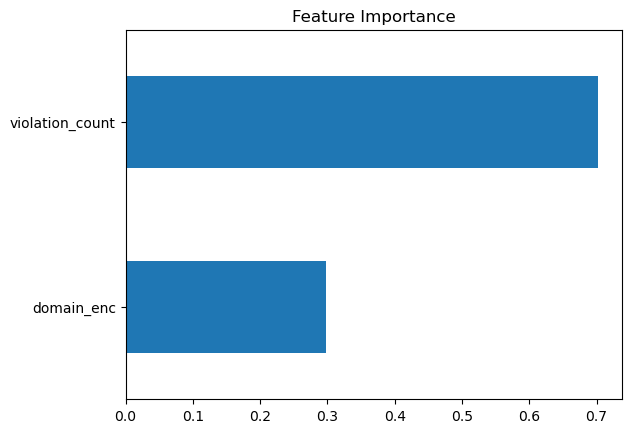

In [56]:
importance.sort_values().plot(kind='barh', title='Feature Importance')


<Axes: ylabel='domain_category'>

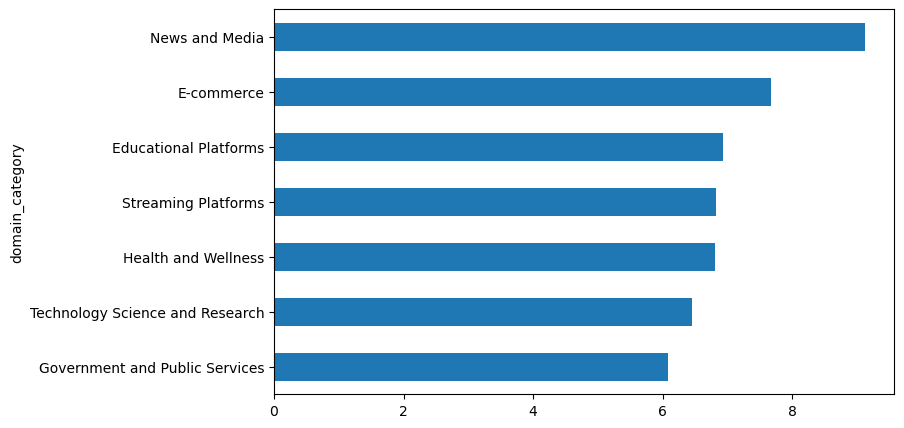

In [57]:
df.groupby('domain_category')['violation_count'].mean().sort_values().plot(kind='barh', figsize=(8,5))


In [58]:
df.to_csv("clean_accessguru.csv", index=False)


In [59]:
final_summary = df.groupby('domain_category').agg(
    total_pages=('web_URL_id','nunique'),
    avg_violation=('violation_count','mean'),
    high_risk_rate=('high_risk','mean')
).sort_values('high_risk_rate', ascending=False)

final_summary


,total_pages,avg_violation,high_risk_rate
domain_category,,,
Technology Science and Research,121,6.454268,0.580793
Educational Platforms,114,6.930435,0.579130
E-commerce,55,7.675362,0.550725
Streaming Platforms,76,6.827214,0.509719
Health and Wellness,39,6.806061,0.509091
News and Media,118,9.114894,0.495745
Government and Public Services,81,6.078947,0.423684


<Axes: title={'center': 'High Risk Rate by Domain'}, xlabel='domain_category'>

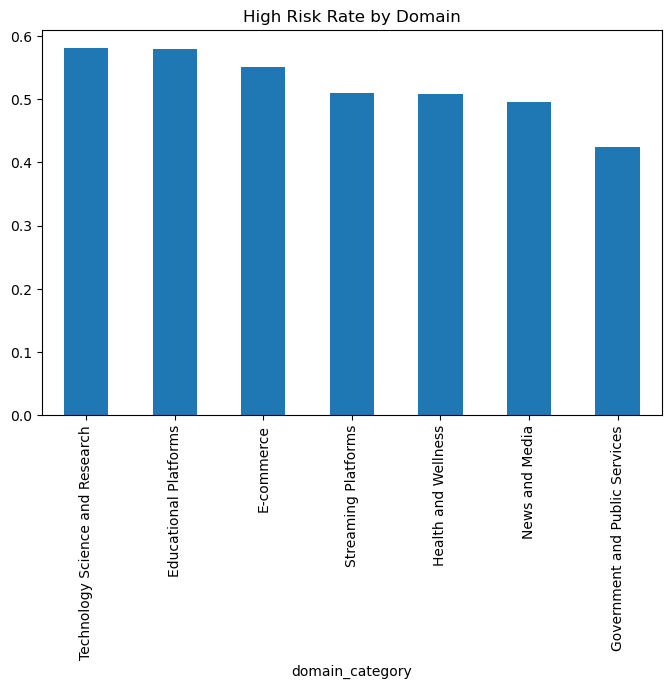

In [60]:
final_summary['high_risk_rate'].plot(kind='bar', figsize=(8,5), title='High Risk Rate by Domain')


<Axes: title={'center': 'Average Accessibility Violations by Domain'}, ylabel='domain_category'>

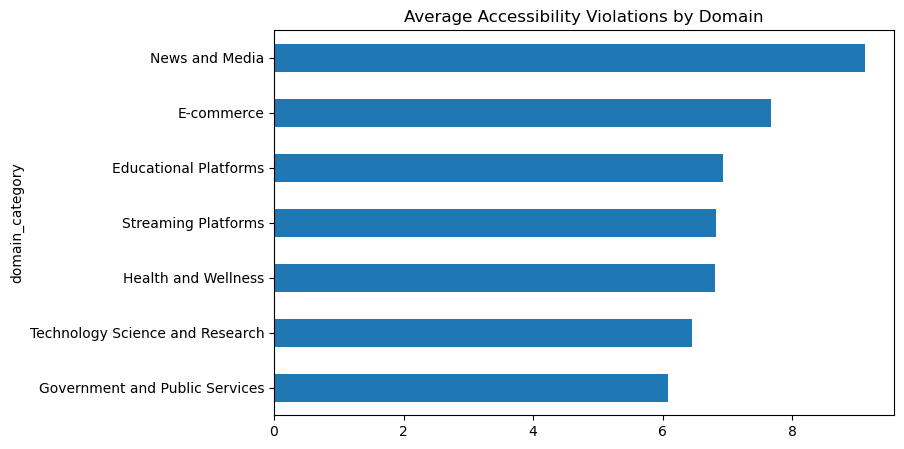

In [61]:
df.groupby('domain_category')['violation_count'].mean().sort_values().plot(
    kind='barh', figsize=(8,5), title='Average Accessibility Violations by Domain'
)


<Axes: title={'center': 'Top 10 Accessibility Violations'}, xlabel='violation_name'>

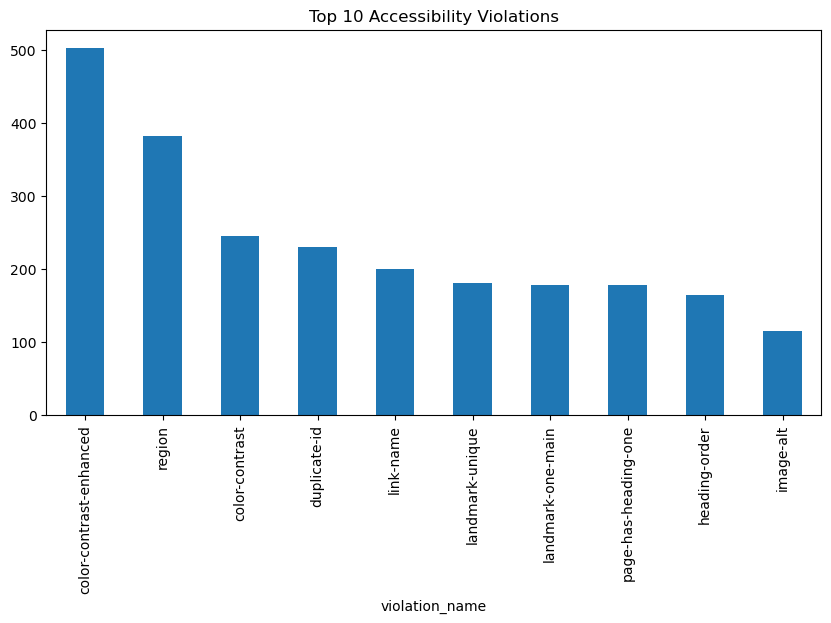

In [62]:
df['violation_name'].value_counts().head(10).plot(
    kind='bar', figsize=(10,5), title='Top 10 Accessibility Violations'
)


In [63]:
pd.crosstab(df['domain_category'], df['violation_category'], normalize='index')*100


violation_category,Layout,Semantic,Syntax,nan
domain_category,,,,
E-commerce,21.159420,0.000000,78.840580,0.000000
Educational Platforms,27.652174,4.521739,67.826087,0.000000
Government and Public Services,20.263158,0.000000,79.736842,0.000000
Health and Wellness,29.090909,0.000000,70.909091,0.000000
News and Media,22.765957,0.000000,77.234043,0.000000
Streaming Platforms,24.622030,0.000000,75.377970,0.000000
Technology Science and Research,25.609756,1.067073,72.713415,0.609756


<Axes: title={'center': 'Violation Category Distribution by Domain'}, xlabel='domain_category'>

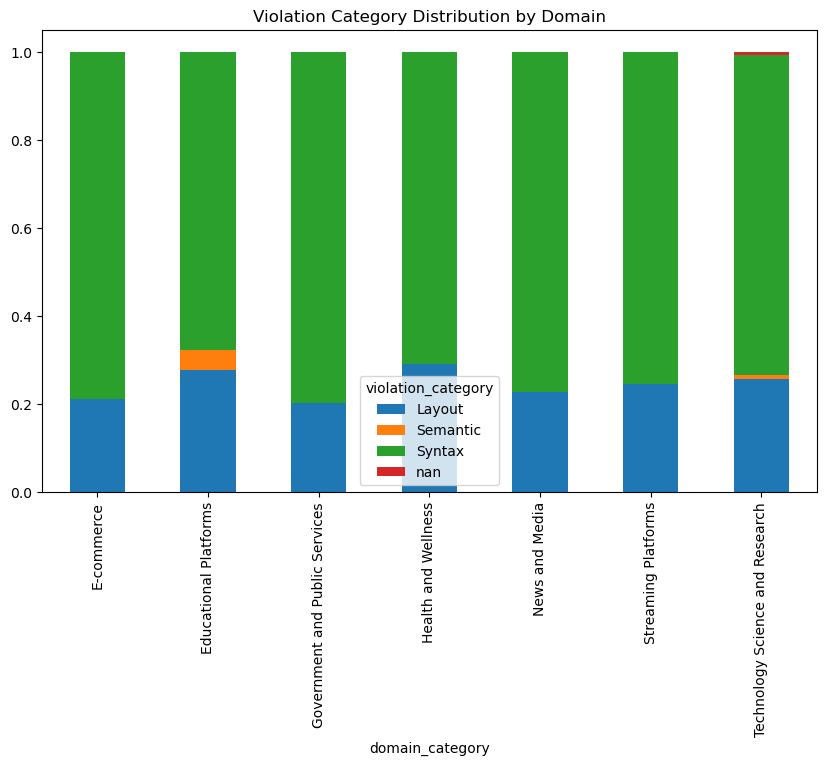

In [64]:
pd.crosstab(df['domain_category'], df['violation_category'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10,6), title='Violation Category Distribution by Domain'
)


In [65]:
top_severe = df.sort_values('violation_score', ascending=False).head(10)
top_severe[['web_URL','domain_category','violation_score','violation_impact']]


,web_URL,domain_category,violation_score,violation_impact
406,https://www.ted.com,Streaming Platforms,5,critical
1030,https://www.nbcnews.com/sports,News and Media,5,critical
2763,https://www.pluralsight.com,Technology Science and Research,5,critical
2762,https://www.pluralsight.com,Streaming Platforms,5,critical
2761,https://www.pluralsight.com,Educational Platforms,5,critical
1821,https://www.pacer.uscourts.gov,Government and Public Services,5,critical
1027,https://www.nbcnews.com/sports,News and Media,5,critical
1026,https://www.nbcnews.com/sports,News and Media,5,critical
2757,https://www.pluralsight.com,Technology Science and Research,5,critical
2756,https://www.pluralsight.com,Streaming Platforms,5,critical


In [68]:
severe_pages = (
    df.groupby(['web_URL','domain_category'])
      .agg(
          max_violation_score=('violation_score','max'),
          total_violations=('violation_count','sum'),
          avg_violation_score=('violation_score','mean'),
          high_risk_rate=('high_risk','mean')
      )
      .reset_index()
      .sort_values(['max_violation_score','total_violations'], ascending=False)
      .head(10)
)

severe_pages


,web_URL,domain_category,max_violation_score,total_violations,avg_violation_score,high_risk_rate
458,https://www.spss.com,Technology Science and Research,5,324,3.888889,0.722222
122,https://www.cloudacademy.com,Educational Platforms,5,289,3.882353,0.705882
487,https://www.thehindu.com,News and Media,5,289,3.352941,0.411765
468,https://www.tampabay.com,News and Media,5,256,3.625000,0.562500
56,https://www.acefitness.org,Health and Wellness,5,225,3.800000,0.600000
326,https://www.nbcnews.com/select,News and Media,5,225,3.866667,0.666667
392,https://www.philly.com,News and Media,5,225,3.533333,0.466667
313,https://www.msnbc.com,News and Media,5,196,3.357143,0.428571
323,https://www.nbcnews.com,News and Media,5,196,3.571429,0.500000
324,https://www.nbcnews.com/,News and Media,5,196,3.571429,0.500000


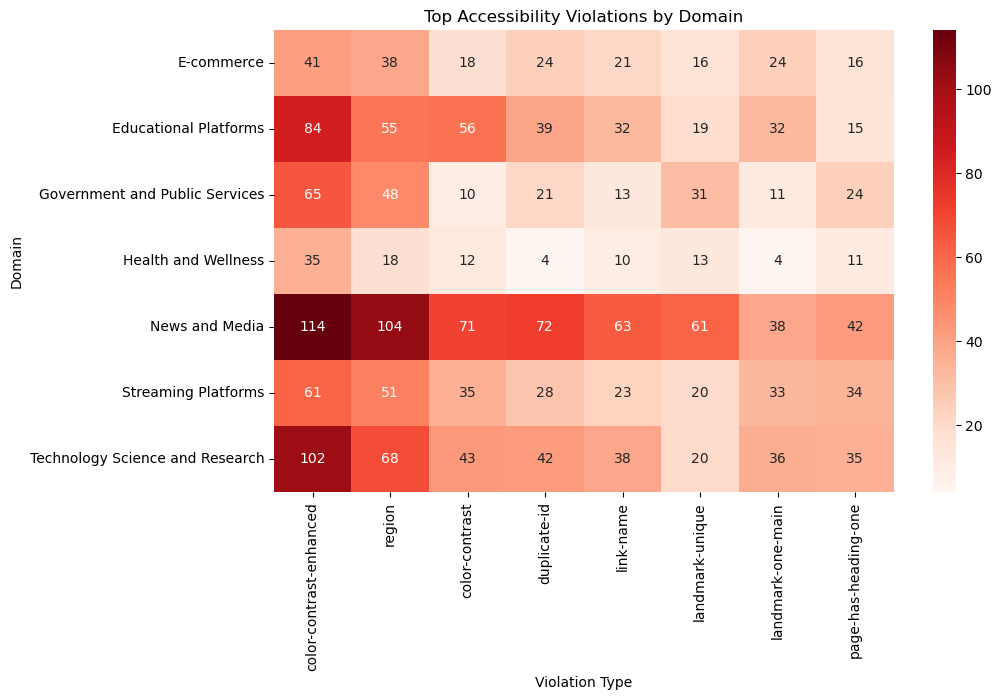

In [70]:
# get top 8 violation types overall
top_violations = df['violation_name'].value_counts().head(8).index

# build crosstab using those top violations
heat = pd.crosstab(df['domain_category'], df['violation_name'])

# keep only top violations
heat = heat[top_violations]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(heat, cmap="Reds", annot=True, fmt="d")
plt.title("Top Accessibility Violations by Domain")
plt.ylabel("Domain")
plt.xlabel("Violation Type")
plt.show()



In [72]:
gov_vs_ecom = heat.loc[['Government and Public Services','E-commerce']]
gov_vs_ecom



violation_name,color-contrast-enhanced,region,color-contrast,duplicate-id,link-name,landmark-unique,landmark-one-main,page-has-heading-one
domain_category,,,,,,,,
Government and Public Services,65,48,10,21,13,31,11,24
E-commerce,41,38,18,24,21,16,24,16


In [73]:
gov_vs_ecom_pct = gov_vs_ecom.div(gov_vs_ecom.sum(axis=1), axis=0) * 100
gov_vs_ecom_pct.round(2)



violation_name,color-contrast-enhanced,region,color-contrast,duplicate-id,link-name,landmark-unique,landmark-one-main,page-has-heading-one
domain_category,,,,,,,,
Government and Public Services,29.15,21.52,4.48,9.42,5.83,13.90,4.93,10.76
E-commerce,20.71,19.19,9.09,12.12,10.61,8.08,12.12,8.08


In [3]:
import pandas as pd

df = pd.read_csv("Access_to_Tech_Dataset.csv")  



In [4]:
df.head()


,id,web_URL_id,domain_category,web_URL,scrape_status,html_file_name,html_file_path,violation_count,violation_name,violation_score,...,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116
0,700_0,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,color-contrast-enhanced,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,700_1,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,landmark-banner-is-top-level,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,700_2,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,landmark-no-duplicate-banner,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,700_3,700,Government and Public Services,https://www.usa.gov/about-the-us,scraped,www_usa_gov_about_the_us.html,/content/workspace/FullPipeline/html_pages_asy...,4,landmark-unique,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,701_0,701,Government and Public Services,https://www.usa.gov/benefits,scraped,www_usa_gov_benefits.html,/content/workspace/FullPipeline/html_pages_asy...,4,color-contrast-enhanced,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes



id                 object
web_URL_id         object
domain_category    object
web_URL            object
scrape_status      object
                    ...  
Unnamed: 112       object
Unnamed: 113       object
Unnamed: 114       object
Unnamed: 115       object
Unnamed: 116       object
Length: 117, dtype: object